# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#additonal Dependencies
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_results = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
complete_data_results.head()

#complete_data_results.dtypes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [40]:
# Checking the number of mice.
num_mice = len(complete_data_results["Mouse ID"].unique())
print(f"Unique Mice Id's Count: {num_mice}")

Unique Mice Id's Count: 249


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Create DF MouseID & Timpoint
dup_mice_df = complete_data_results[complete_data_results.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"]
#dup_mice_df.head()

#get unique mouse id with duplicates
dup_unique_mice_id = dup_mice_df.unique()
dup_unique_mice_id

array(['g989'], dtype=object)

In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = complete_data_results.loc[complete_data_results["Mouse ID"] == "g989", :]
dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#used drop_duplicates() found from geeksforgeeks // drop_duplicates yielded 249 unique IDs
#https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

#clean_df = complete_data_results.drop_duplicates(["Mouse ID", "Timepoint"])
#clean_df.head()

#https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-value-in-pandas/
#try: Syntax: dataframe[dataframe.column_name.isin(list_of_values) == False]

clean_df = complete_data_results[complete_data_results['Mouse ID'].isin(dup_unique_mice_id)==False]
clean_df.head()

#above code yielded 248 like starter code example NOTE to use .isin to remove specific dups

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [44]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice = len(clean_df["Mouse ID"].unique())
print(f"Unique Mice Ids Count: {clean_num_mice}")

Unique Mice Ids Count: 248


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#groupby drugs
drug_group = clean_df.groupby(["Drug Regimen"])
#drug_group.head()

#get mean, median, variance, standard deviation, and SEM of the tumor volume by drug
tumor_mean = drug_group["Tumor Volume (mm3)"].mean().map("{:.2f}".format)
#tumor_mean
tumor_median = drug_group["Tumor Volume (mm3)"].median().map("{:.2f}".format)
tumor_variance = drug_group["Tumor Volume (mm3)"].var().map("{:.2f}".format)
tumor_std = drug_group["Tumor Volume (mm3)"].std().map("{:.2f}".format)
tumor_sem = drug_group["Tumor Volume (mm3)"].sem().map("{:.2f}".format)

#create df of data
tumor_summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, 
                                 "Median Tumor Volume": tumor_median, 
                                 "Tumor Volume Variance": tumor_variance, 
                                 "Tumor Volume Std. Dev.": tumor_std, 
                                 "Tumor Volume Std. Err.": tumor_sem})
tumor_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
#https://www.geeksforgeeks.org/python-pandas-series-agg/
#https://www.w3schools.com/python/pandas/ref_df_agg.asp

summary_agg = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean",
                                                                          "median",
                                                                          "var",
                                                                          "std",
                                                                          "sem"]})
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

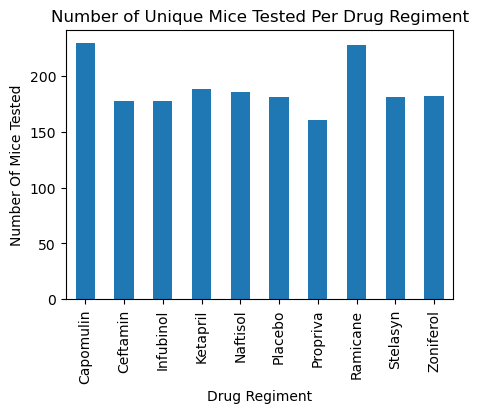

In [47]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_drug = complete_data_results.groupby(["Drug Regimen"]).count()["Mouse ID"]

pandas_bar_plot = mice_per_drug.plot(kind="bar",figsize=(5,3.5))
plt.title("Number of Unique Mice Tested Per Drug Regiment")
plt.xlabel("Drug Regiment")
plt.ylabel("Number Of Mice Tested")
plt.show()

#plt.savefig("")


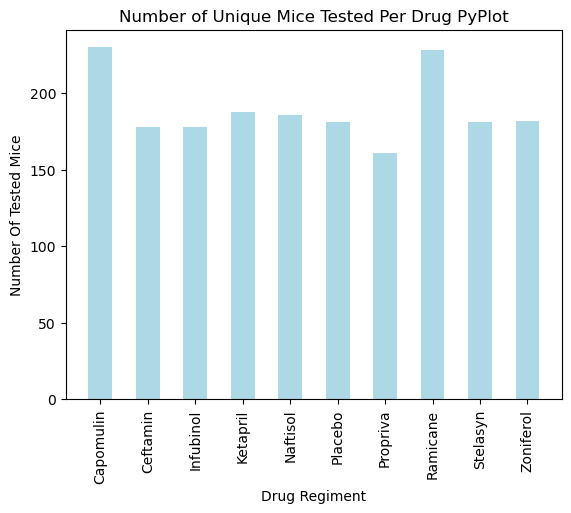

In [48]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#width https://www.w3schools.com/python/matplotlib_bars.asp
#color https://www.w3schools.com/colors/colors_names.asp
x_axis = np.arange(len(mice_per_drug))
y_axis = (complete_data_results.groupby(["Drug Regimen"]).count()["Mouse ID"])
width = 0.50

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_per_drug.index.values,rotation="vertical")
plt.bar(x_axis, y_axis, color='LightBlue', align="center", width=width) 
plt.title("Number of Unique Mice Tested Per Drug PyPlot")
plt.xlabel("Drug Regiment")
plt.ylabel("Number Of Tested Mice")
plt.show()

#plt.savefig("")

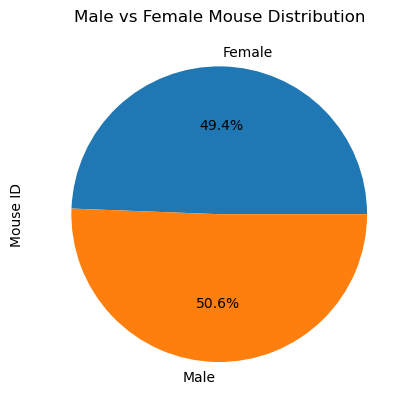

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = complete_data_results.groupby(["Sex"]).count()["Mouse ID"]
#print(mice_gender)
explode = [0.1, 0]
mice_gender.plot(kind="pie", autopct="%1.1f%%")
plt.title("Male vs Female Mouse Distribution")

plt.show()
#plt.savefig("")

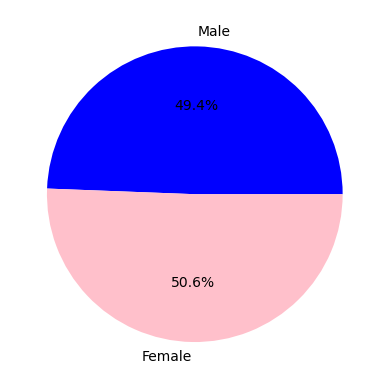

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["blue", "pink"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

plt.pie(mice_gender, labels=labels, colors=colors,autopct="%1.1f%%")

plt.show()
#plt.savefig("")

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_treatment_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") |
                          (clean_df["Drug Regimen"] == "Ramicane") |
                          (clean_df["Drug Regimen"] == "Infubinol") |
                          (clean_df["Drug Regimen"] == "Ceftamin"),:]
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = drug_treatment_df.groupby(["Mouse ID"])["Timepoint"].last().reset_index()
#greatest_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = greatest_timepoint.merge(clean_df,on = ["Mouse ID","Timepoint"], how = "left")
merge_df  



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [52]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_volume_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drugs in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge_df.loc[merge_df["Drug Regimen"] == drugs,"Tumor Volume (mm3)"]
    
    # add subset 
    total_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
   
    
    print(f"{drugs} outliers could be below {lower_bound:.2f} mm3 or above {upper_bound:.2f} mm3") 
    

Capomulin outliers could be below 20.70 mm3 or above 51.83 mm3
Ramicane outliers could be below 17.91 mm3 or above 54.31 mm3
Infubinol outliers could be below 36.83 mm3 or above 82.74 mm3
Ceftamin outliers could be below 25.36 mm3 or above 87.67 mm3


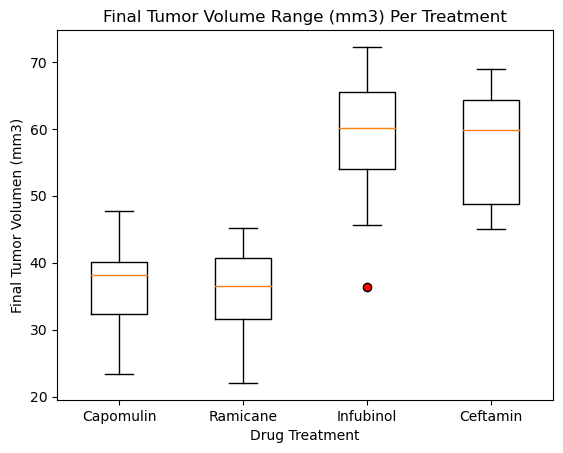

In [53]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html

red_circle = dict(markerfacecolor="r", marker="o")
plt.title("Final Tumor Volume Range (mm3) Per Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Final Tumor Volumen (mm3)")
plt.boxplot(total_volume_data, labels = treatments, flierprops = red_circle)
#plt.savefig("")
plt.show()


## Line and Scatter Plots

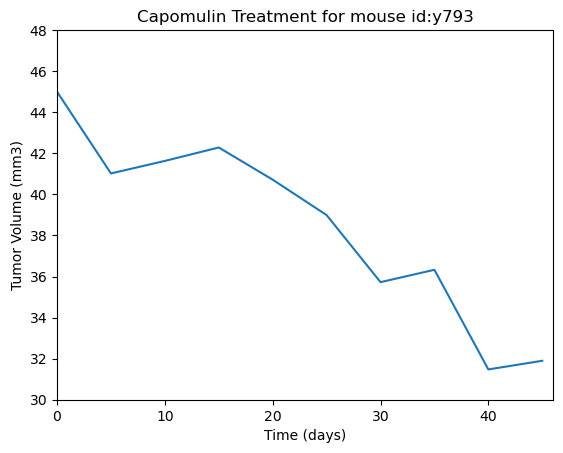

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = "y793"

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
capomulin_df.head()

id_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id, :]
x_axis = id_df["Timepoint"]
y_axis = id_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlim((0, 46))
plt.ylim((30,48))

plt.title(f"Capomulin Treatment for mouse id:{mouse_id}")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
#plt.savefig("")
plt.show()


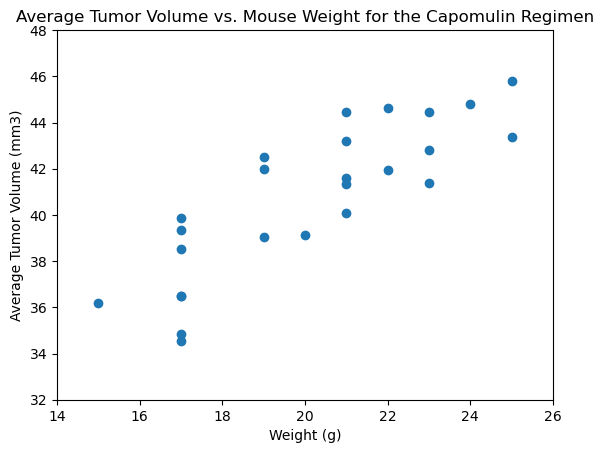

In [55]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

gb_mouse_id = capomulin_df.groupby(["Mouse ID"]).mean()

x_axis = gb_mouse_id["Weight (g)"]
y_axis = gb_mouse_id["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.xlim((14, 26))
plt.ylim((32, 48))
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
#plt.savefig("")
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


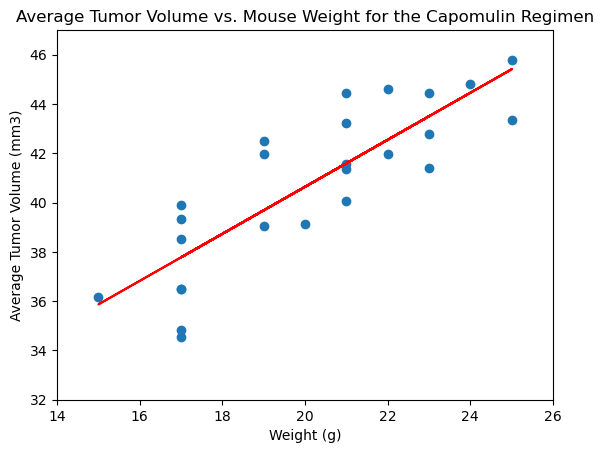

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

gb_mouse_id = capomulin_df.groupby(["Mouse ID"]).mean()

x_axis = gb_mouse_id["Weight (g)"]
y_axis = gb_mouse_id["Tumor Volume (mm3)"]

corr=st.pearsonr(x_axis,y_axis)[0]
print(f"The correlation between mouse weight and average tumor volume is: {corr:.2f}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept

plt.scatter(x_axis, y_axis)
plt.xlim((14, 26))
plt.ylim((32, 47))
plt.plot(x_axis, regress_values, "r-")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
#plt.savefig("")
plt.show()